### Basit Doğrusal Regresyon Modeli Uygulaması

Linear Regression ile Satış Tahmin Modeli

In [1]:
# Kütühaneler:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression # Doğrusal Regresyon
from sklearn.metrics import mean_squared_error, mean_absolute_error # Model Başarı Metrikleri
from sklearn.model_selection import train_test_split, cross_val_score # Model Test ve Eğitim Kütüphanesi

# Pandas ayarları
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
########################################################################
# Scikit-Learn kullanarak En Küçük Kareler Yöntemi ile Basit Doğrusal Regresyon 
# Simple Linear Regression with OLS Using Scikit-Learn
########################################################################

In [3]:
# Veri Setini Oku
df = pd.read_csv("advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
1,230.10,37.80,69.20,22.10
2,44.50,39.30,45.10,10.40
3,17.20,45.90,69.30,9.30
4,151.50,41.30,58.50,18.50
5,180.80,10.80,58.40,12.90


In [5]:
df.shape

(200, 4)

In [10]:
X = df[["TV"]]
y = df[["sales"]] # Bağımlı (target) değişken

In [11]:
########################################################################
# Model
########################################################################

reg_model = LinearRegression().fit(X, y)

# y(tahmin) = b + w * x  # x = TV

In [12]:
# sabit (b - bias)
reg_model.intercept_[0]

7.032593549127695

In [15]:
# tv'nin katsayısı (w1 - weight)
reg_model.coef_[0][0]

0.04753664043301975

In [16]:
########################################################################
# Tahmin (Prediction)
########################################################################

In [18]:
# 150 birimlik TV harcaması olursa ne kadar satış olur?
# sales = b + w1 * TV

reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [19]:
# 500 birimlik TV harcaması olursa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

30.800913765637567

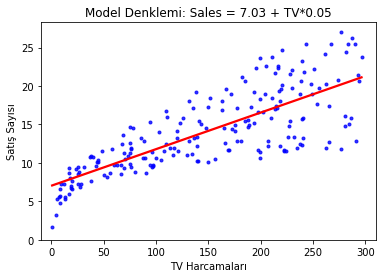

In [22]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={"color":"b","s":9},
                ci=False, color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0],2)}")
g.set_xlabel("TV Harcamaları")
g.set_ylabel("Satış Sayısı")
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

In [23]:
########################################################################
# Tahmin Başarısı (Prediction Accuracy)
########################################################################

In [24]:
y_pred = reg_model.predict(X) # y_tahmin = b + w * x  # x = TV (y_pred = y_tahmin)

In [25]:
# MSE (Mean Squared Error) Hata Kareler Ortalaması
mean_squared_error(y, y_pred)

10.512652915656757

In [27]:
y.mean()

sales   14.02
dtype: float64

In [28]:
y.std()

sales   5.22
dtype: float64

In [29]:
# RMSE (Root Mean Squared Error) Hata Karelerinin Kökleri Ortalaması
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [30]:
# MAE (Mean Absolute Error) Hata Mutlaklarının Ortalaması
mean_absolute_error(y, y_pred)

2.549806038927486

In [31]:
# R-Squared (R-Kare) # Bağımsız değişkenin bağımlı değişkeni açıklama 
reg_model.score(X, y)

0.611875050850071